In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
wine = load_wine()

df = pd.DataFrame(data=wine.data, columns=wine.feature_names)



In [210]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [211]:
df['quality']=wine.target
df['quality'].value_counts()

quality
1    71
0    59
2    48
Name: count, dtype: int64

In [212]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,quality
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [213]:
X = df.drop('quality', axis=1)
y = df['quality']

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [215]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

In [216]:
model=LinearRegression()

In [217]:
model.fit(X_train_scaled,y_train)

LinearRegression()

In [218]:
y_prediction=model.predict(X_test_scaled)
y_prediction_total=np.round(y_prediction).astype(int)





In [219]:
mse=mean_squared_error(y_test,y_prediction_total)

In [220]:
print(accuracy_score(y_test,y_prediction_total))
print(mse)
print(np.sqrt(mse))

0.9166666666666666
0.08333333333333333
0.28867513459481287


In [221]:
importance_param=pd.Series(model.coef_,index=wine.feature_names)
print(importance_param.abs().sort_values())

magnesium                       0.000551
proanthocyanins                 0.010234
hue                             0.021309
nonflavanoid_phenols            0.040927
malic_acid                      0.049415
ash                             0.057030
alcohol                         0.089306
total_phenols                   0.096726
alcalinity_of_ash               0.151572
color_intensity                 0.178437
od280/od315_of_diluted_wines    0.202596
proline                         0.210057
flavanoids                      0.353594
dtype: float64


C:\Users\Marko\AppData\Local\Temp\ipykernel_12816\285699013.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance_param.abs(),y=importance_param.abs().index,palette='viridis')


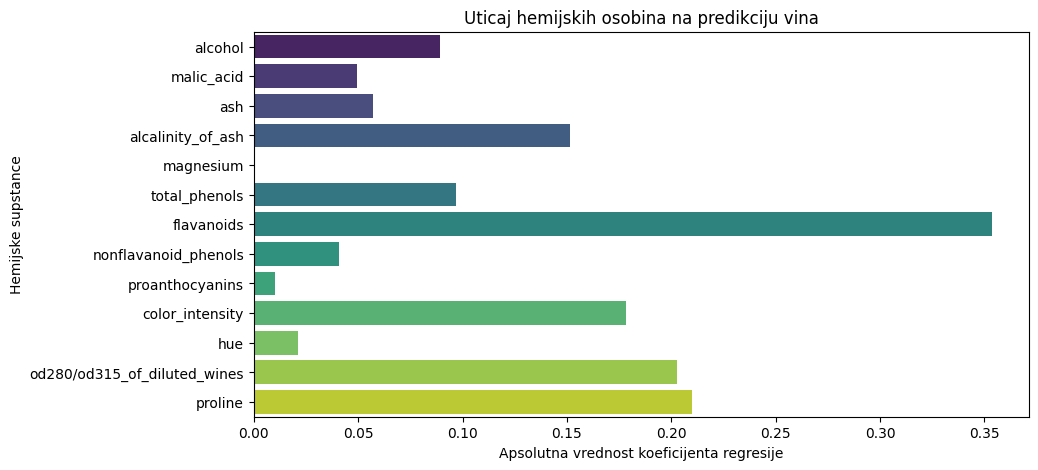

In [222]:
plt.figure(figsize=(10,5))
sns.barplot(x=importance_param.abs(),y=importance_param.abs().index,palette='viridis')
plt.title("Uticaj hemijskih osobina na predikciju vina")
plt.xlabel("Apsolutna vrednost koeficijenta regresije")
plt.ylabel("Hemijske supstance")
plt.show()



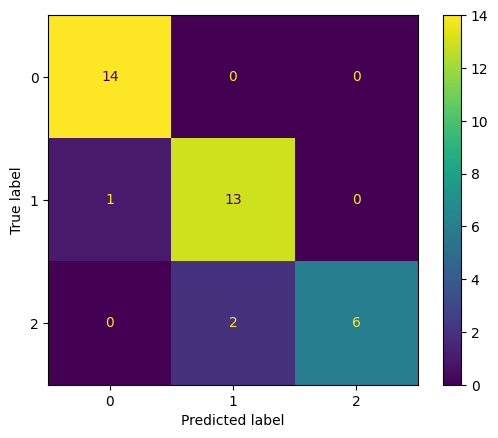

In [223]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_prediction_total)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [224]:
model2 = GaussianNB()

In [225]:
model2.fit(X_train_scaled,y_train)

GaussianNB()

In [226]:
y_prediction2=model2.predict(X_test_scaled)
mse2=mean_squared_error(y_test,y_prediction2)

In [227]:
print(accuracy_score(y_test,y_prediction2))
print(mse2)
print(np.sqrt(mse2))

1.0
0.0
0.0


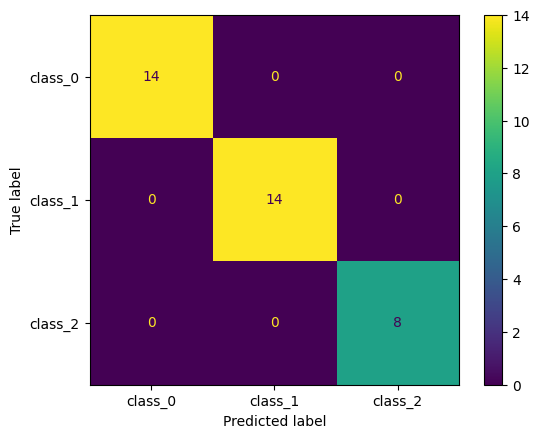

In [228]:
cm=confusion_matrix(y_test,y_prediction2)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=wine.target_names)
disp.plot()

In [229]:
model3 = RandomForestClassifier(n_estimators=20, random_state=42)
model3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [230]:
y_pred_rf = model3.predict(X_test)

In [231]:
print("Random Forest - Izveštaj klasifikacije:")
print(classification_report(y_test, y_pred_rf, target_names=wine.target_names))

Random Forest - Izveštaj klasifikacije:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



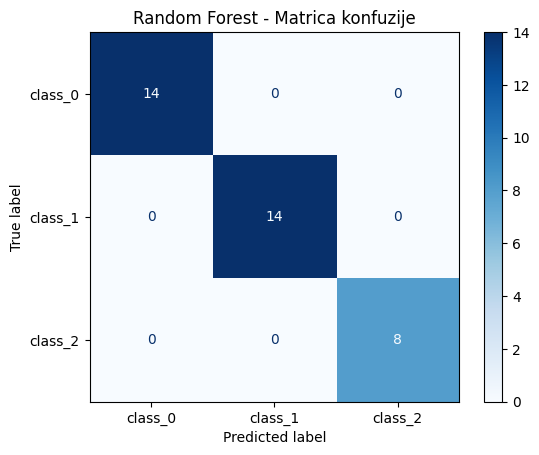

In [232]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=wine.target_names, cmap='Blues')
plt.title("Random Forest - Matrica konfuzije")
plt.show()

In [233]:
cv_scores = cross_val_score(model3, X, y, cv=5, scoring='accuracy')

In [234]:
print("Rezultati po fold-ovima:")
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nProsečna tačnost: {cv_scores.mean():.4f}")
print(f"Standardna devijacija: {cv_scores.std():.4f}")

Rezultati po fold-ovima:
Fold 1: 0.9722
Fold 2: 0.9444
Fold 3: 0.9167
Fold 4: 0.9714
Fold 5: 1.0000

Prosečna tačnost: 0.9610
Standardna devijacija: 0.0283


In [235]:
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [236]:
y_pred_knn = model4.predict(X_test)


In [237]:
print("KNeighborsClassifier - Izveštaj klasifikacije:")
print(classification_report(y_test, y_pred_knn, target_names=wine.target_names))


KNeighborsClassifier - Izveštaj klasifikacije:
              precision    recall  f1-score   support

     class_0       0.86      0.86      0.86        14
     class_1       0.92      0.79      0.85        14
     class_2       0.60      0.75      0.67         8

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.82      0.81      0.81        36



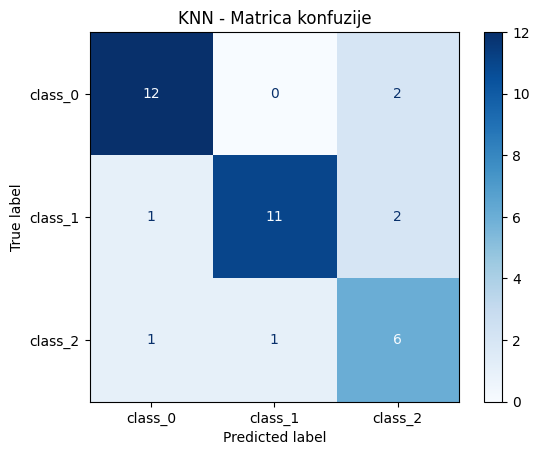

In [238]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=wine.target_names, cmap='Blues')
plt.title("KNN - Matrica konfuzije")
plt.show()
